In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install statsmodels

In [ ]:
!pip install textblob
!pip install spacy
!pip install gensim

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
df = pd.read_csv(r'C:\Users\ephre\Documents\Financial News and Stock Price Integration\data\raw_analyst_ratings.csv\raw_analyst_ratings.csv', parse_dates=['date'])
df["date"].sort_values()

879310           2009-02-14 00:00:00
519806           2009-04-27 00:00:00
1390006          2009-04-27 00:00:00
1432             2009-04-29 00:00:00
67712            2009-05-22 00:00:00
                     ...            
1039004    2020-06-11 16:49:41-04:00
1357564    2020-06-11 16:51:33-04:00
1269090    2020-06-11 17:01:39-04:00
980443     2020-06-11 17:11:20-04:00
1343658    2020-06-11 17:12:35-04:00
Name: date, Length: 1407328, dtype: object

In [27]:
article_counts = df.groupby('publisher').size()
article_counts.sort_values(ascending=False)

publisher
Paul Quintaro             228373
Lisa Levin                186979
Benzinga Newsdesk         150484
Charles Gross              96732
Monica Gerson              82380
                           ...  
White Diamond Research         1
Michael Zanger                 1
Stock Market Newz              1
Forexpros.com                  1
Jim Pearce                     1
Length: 1034, dtype: int64

In [28]:
df["headline_length"] = df["headline"].apply(len)

In [29]:
daily_headlines = df.groupby('date').size()
daily_headlines

date
2009-02-14 00:00:00          1
2009-04-27 00:00:00          2
2009-04-29 00:00:00          1
2009-05-22 00:00:00          1
2009-05-27 00:00:00          6
                            ..
2020-06-11 16:49:41-04:00    1
2020-06-11 16:51:33-04:00    1
2020-06-11 17:01:39-04:00    1
2020-06-11 17:11:20-04:00    1
2020-06-11 17:12:35-04:00    1
Length: 39957, dtype: int64

Text Analysis(Sentiment analysis & Topic Modeling)

In [30]:
import pandas as pd
from textblob import TextBlob
import gensim
from gensim import corpora
import spacy

In [31]:
# Sentiment analysis
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['headline'].apply(get_sentiment)
df['sentiment']


0           neutral
1           neutral
2           neutral
3           neutral
4           neutral
             ...   
1407323    positive
1407324    positive
1407325     neutral
1407326     neutral
1407327     neutral
Name: sentiment, Length: 1407328, dtype: object

In [32]:
!python -m spacy download en_core_web_sm
import spacy

nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return tokens

df['tokens'] = df['headline'].apply(preprocess)
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]

lda_model = gensim.models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=4)

# Output results
print(df[['headline', 'sentiment']])
for topic in topics:
    print(topic)


Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\urllib3\util\connection.py", line 72, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\socket.py", line 962, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py", line 714, in urlopen
    httplib_response = self._make_request(
   

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

Time Series Analysis:

In [33]:
time_series_data = pd.DataFrame({'date': daily_headlines.index, 'Headlines_Count': daily_headlines.values})
time_series_data.set_index('date', inplace=True)

In [34]:
time_series_data

,Headlines_Count
date,
2009-02-14 00:00:00,1
2009-04-27 00:00:00,2
2009-04-29 00:00:00,1
2009-05-22 00:00:00,1
2009-05-27 00:00:00,6
...,...
2020-06-11 16:49:41-04:00,1
2020-06-11 16:51:33-04:00,1
2020-06-11 17:01:39-04:00,1


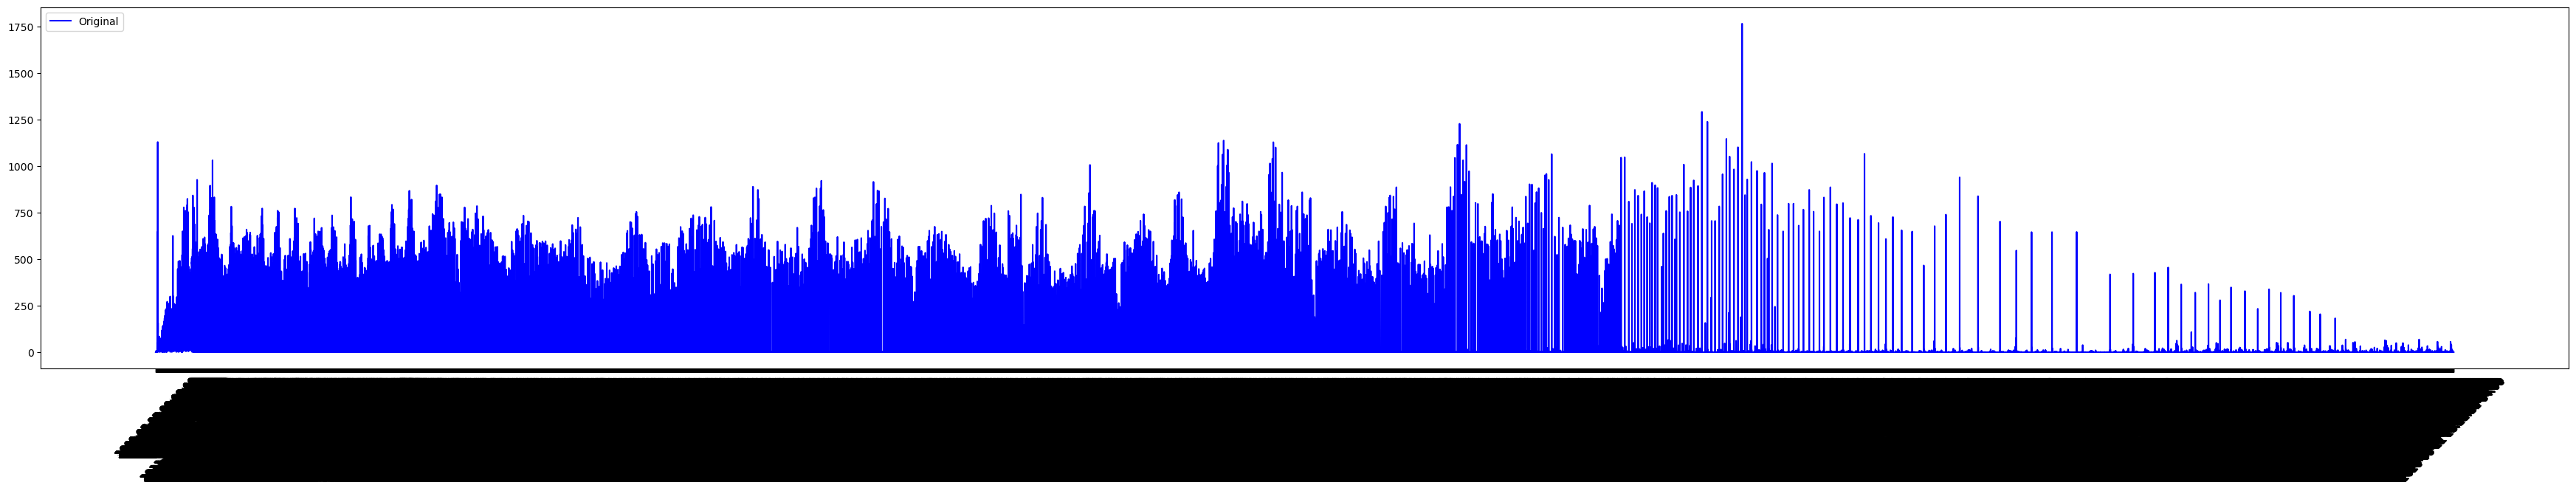

In [35]:
plt.figure(figsize=(35, 25))

plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

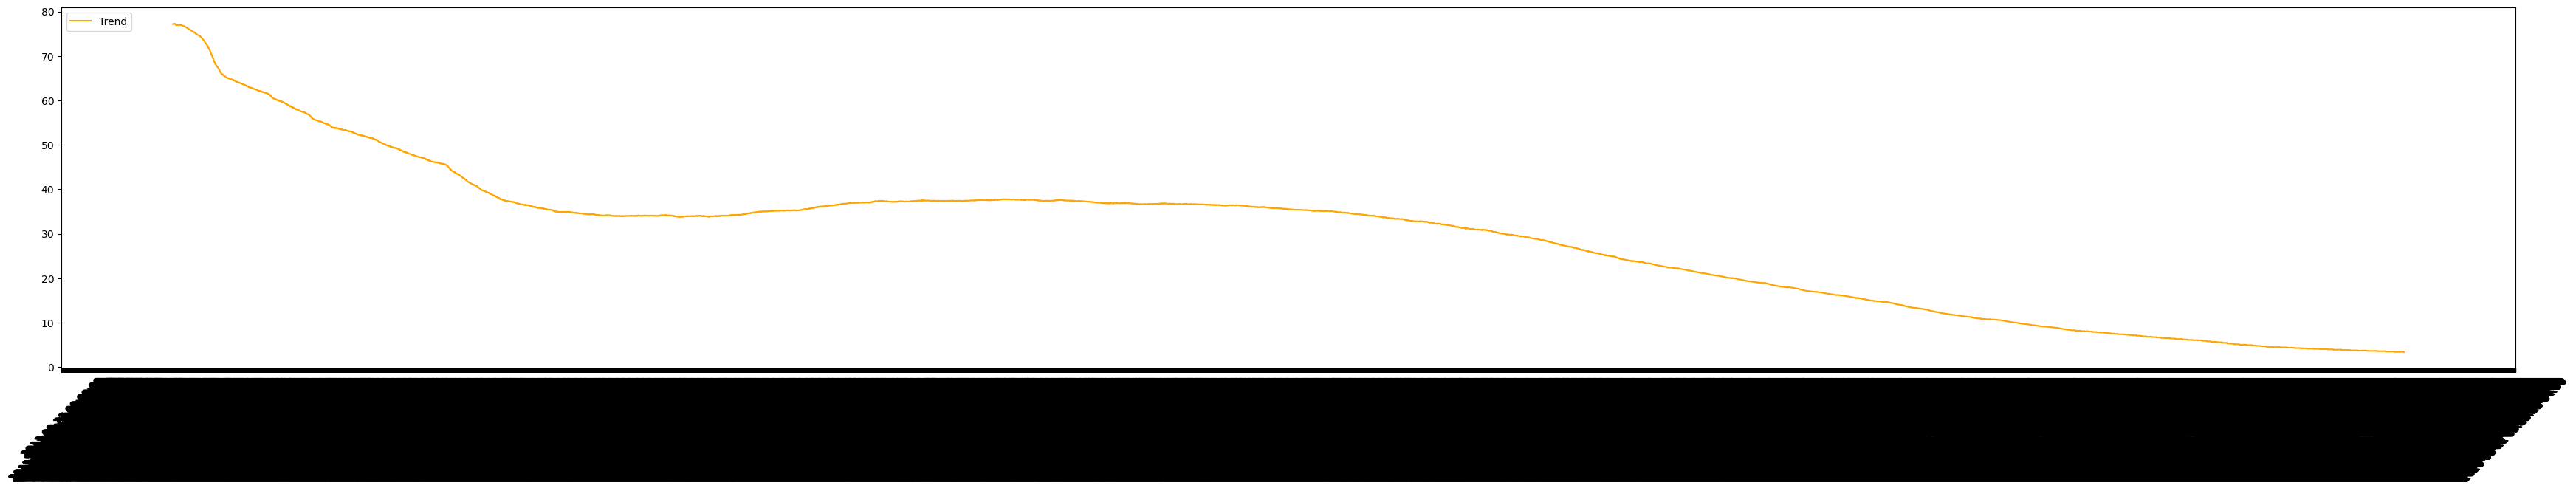

In [36]:
plt.figure(figsize=(35, 25))
decomposition = seasonal_decompose( time_series_data['Headlines_Count'], model='additive', period=10000)

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

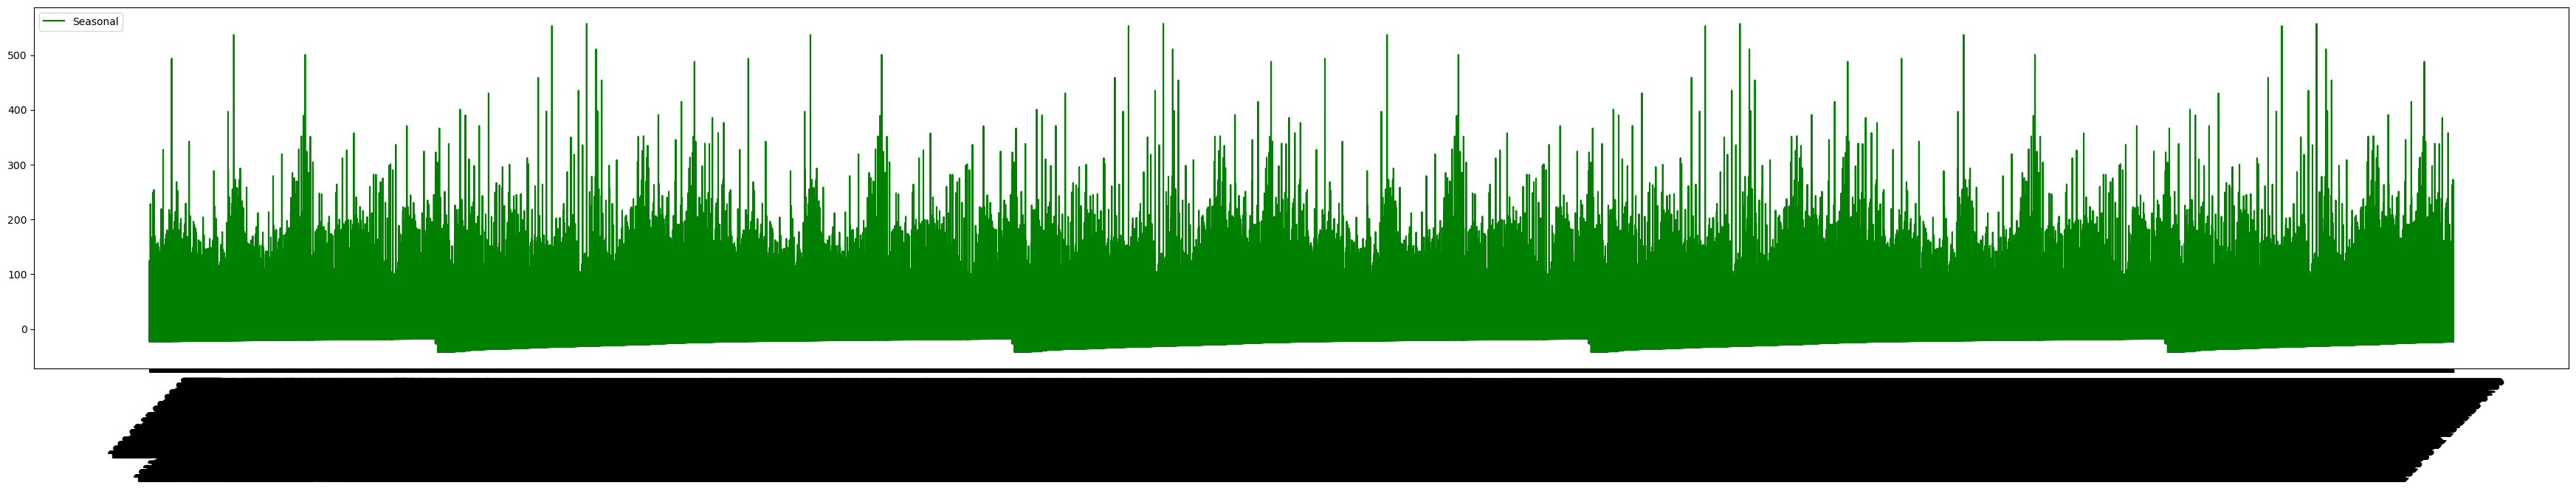

In [37]:
plt.figure(figsize=(35, 25))
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

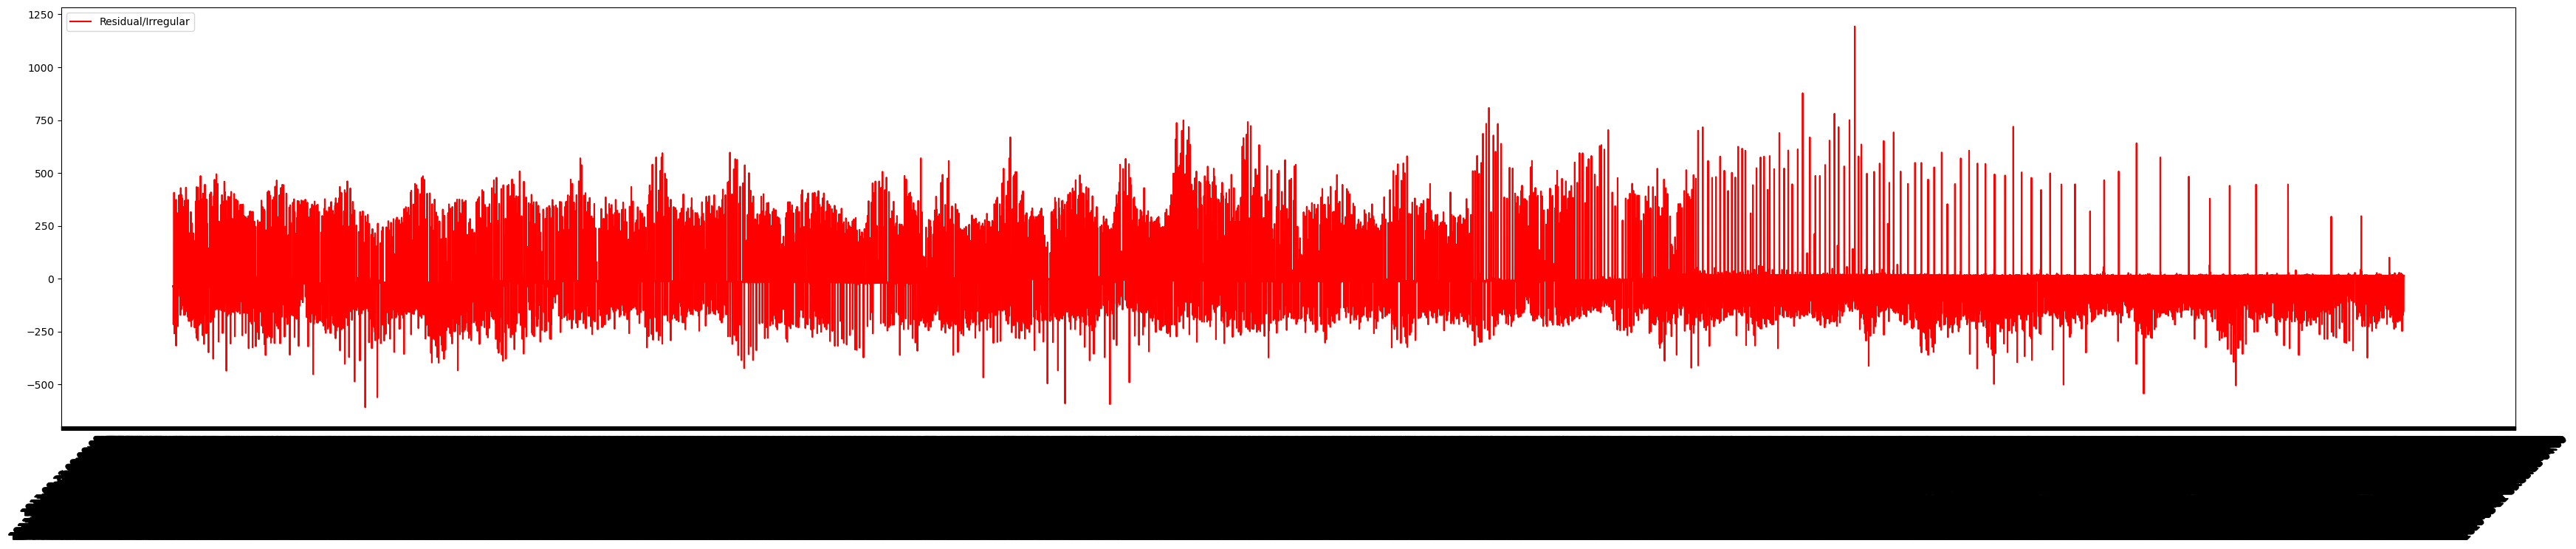

In [38]:
plt.figure(figsize=(35, 25))
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

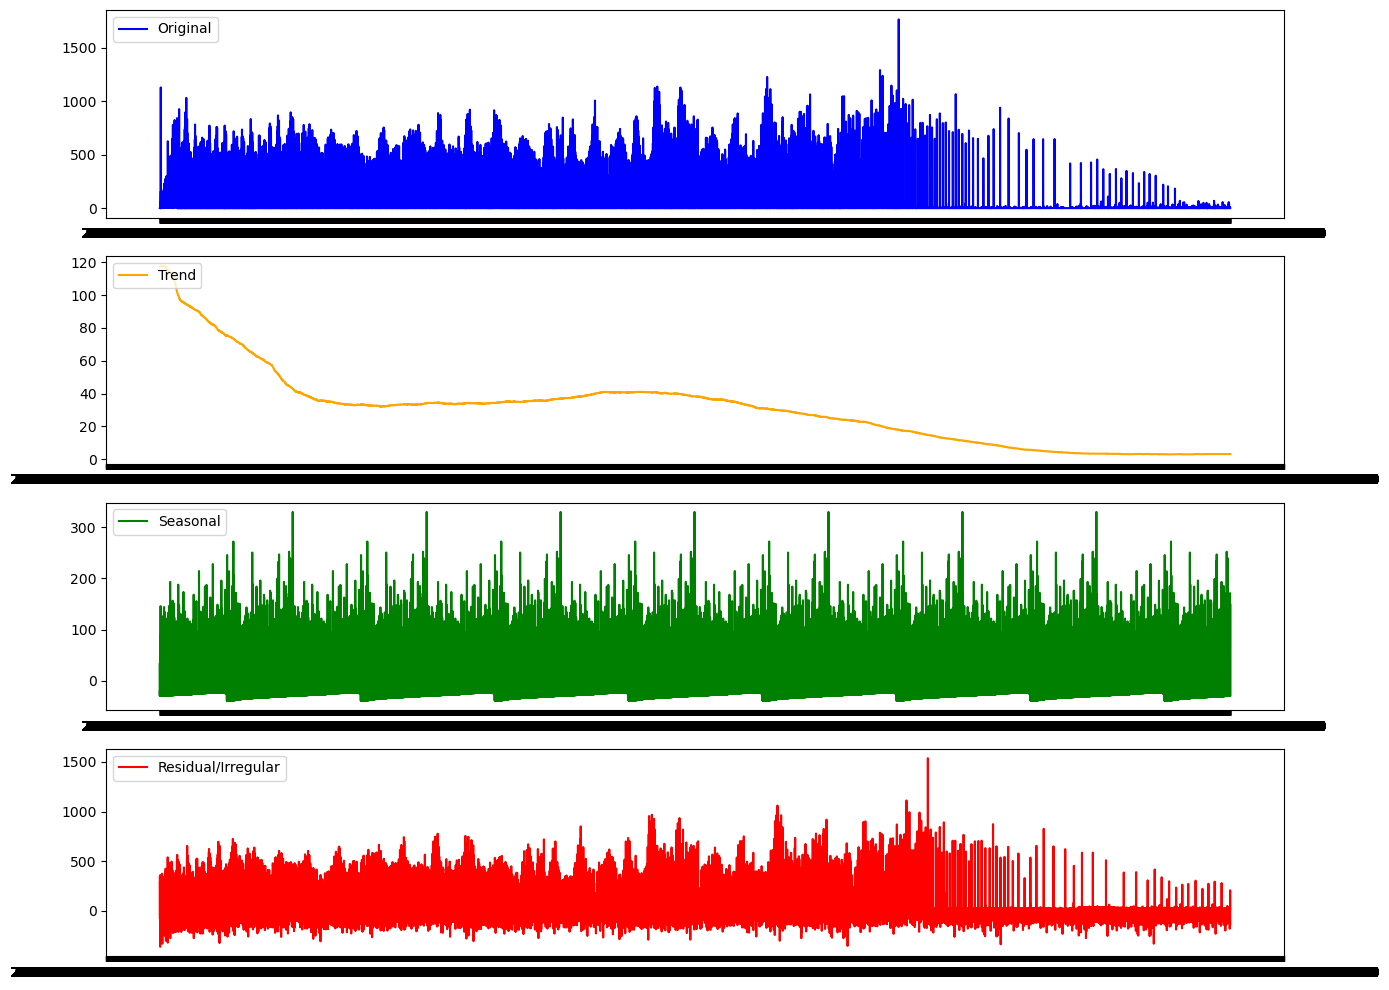

In [43]:
# Simulating data
np.random.seed(0)
dates = pd.date_range(start="2009-02-14", end="2010-02-14", freq='D')
headline_counts = np.random.poisson(lam=5, size=len(dates))  # Simulate headline counts

# Creating a DataFrame
simulated_data = pd.DataFrame({'Date': dates, 'Headlines_Count': headline_counts})

# Set 'Date' as index
simulated_data.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=5000)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')


plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [45]:
# Simulating data
np.random.seed(0)
dates = pd.date_range(start="2010-02-14", end="2011-02-14", freq='D')
headline_counts = np.random.poisson(lam=5, size=len(dates))  # Simulate headline counts

# Creating a DataFrame
simulated_data = pd.DataFrame({'Date': dates, 'Headlines_Count': headline_counts})

# Set 'Date' as index
simulated_data.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=5000)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')


plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
# Simulating data
np.random.seed(0)
dates = pd.date_range(start="2011-02-14", end="2012-02-14", freq='D')
headline_counts = np.random.poisson(lam=5, size=len(dates))  # Simulate headline counts

# Creating a DataFrame
simulated_data = pd.DataFrame({'Date': dates, 'Headlines_Count': headline_counts})

# Set 'Date' as index
simulated_data.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=5000)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')


plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Simulating data
np.random.seed(0)
dates = pd.date_range(start="2012-02-14", end="2013-02-14", freq='D')
headline_counts = np.random.poisson(lam=5, size=len(dates))  # Simulate headline counts

# Creating a DataFrame
simulated_data = pd.DataFrame({'Date': dates, 'Headlines_Count': headline_counts})

# Set 'Date' as index
simulated_data.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=5000)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')


plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Simulating data
np.random.seed(0)
dates = pd.date_range(start="2013-02-14", end="2014-02-14", freq='D')
headline_counts = np.random.poisson(lam=5, size=len(dates))  # Simulate headline counts

# Creating a DataFrame
simulated_data = pd.DataFrame({'Date': dates, 'Headlines_Count': headline_counts})

# Set 'Date' as index
simulated_data.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=5000)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')


plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

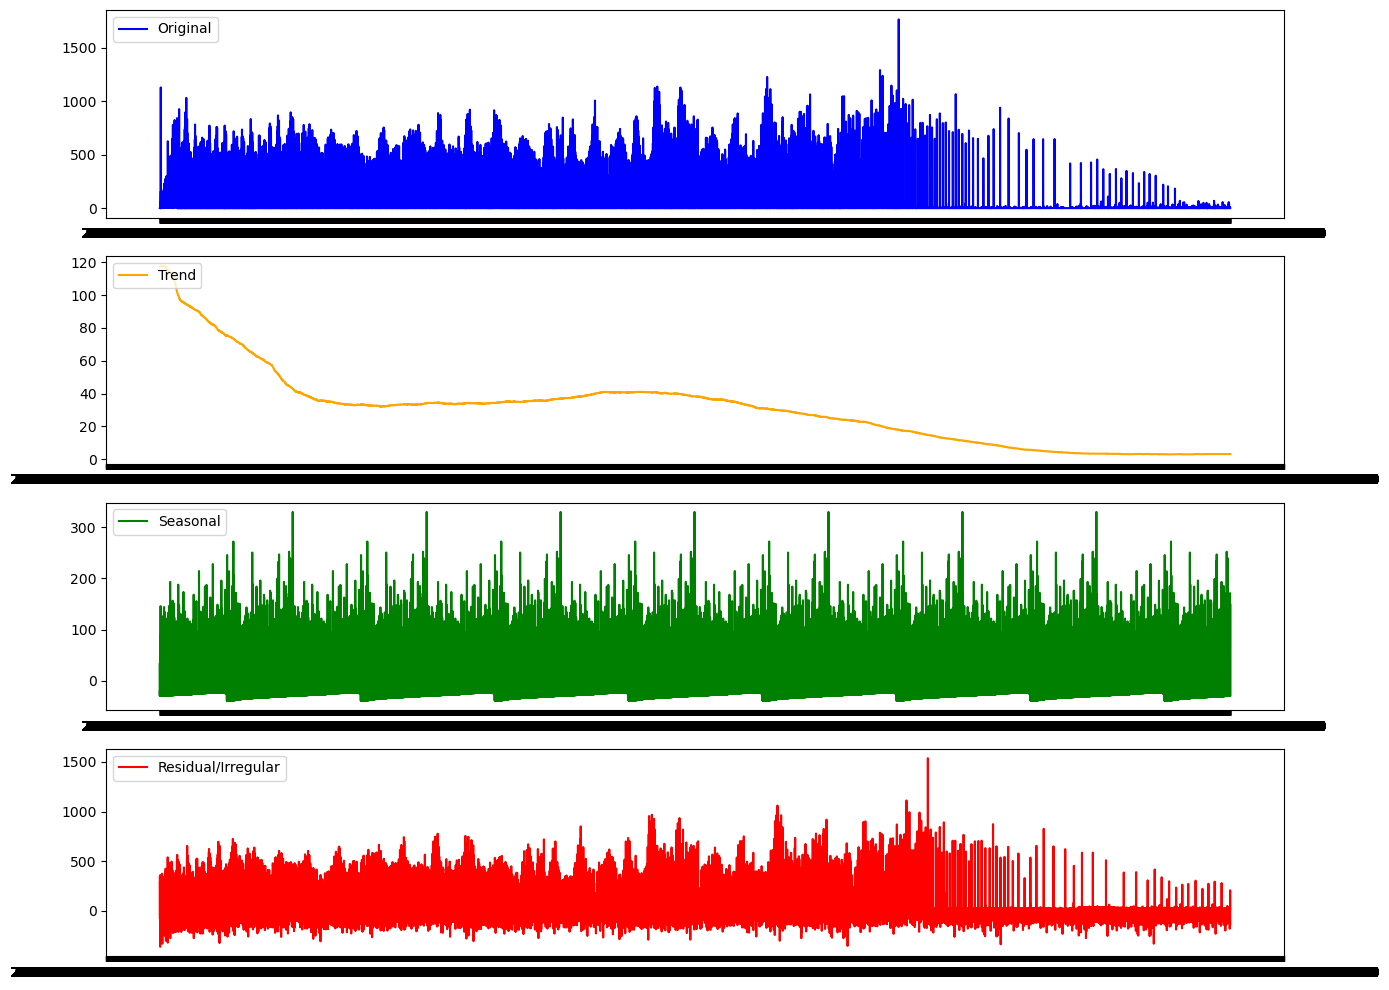

In [ ]:
# Simulating data
np.random.seed(0)
dates = pd.date_range(start="2014-02-14", end="2015-02-14", freq='D')
headline_counts = np.random.poisson(lam=5, size=len(dates))  # Simulate headline counts

# Creating a DataFrame
simulated_data = pd.DataFrame({'Date': dates, 'Headlines_Count': headline_counts})

# Set 'Date' as index
simulated_data.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=5000)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')


plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

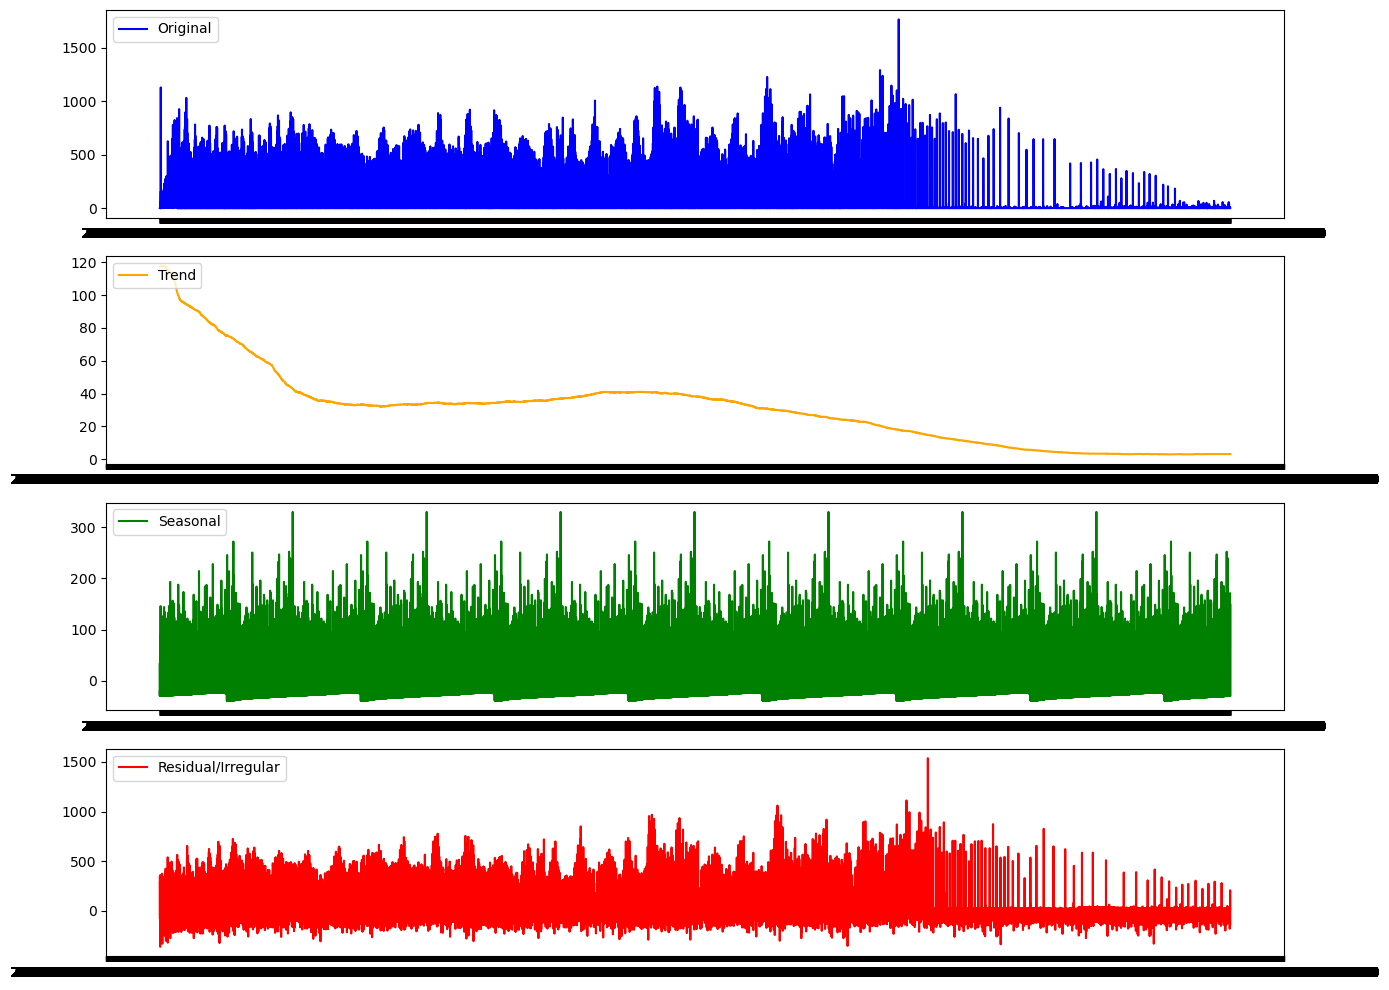

In [ ]:
# Simulating data
np.random.seed(0)
dates = pd.date_range(start="2015-02-14", end="2016-06-11", freq='D')
headline_counts = np.random.poisson(lam=5, size=len(dates))  # Simulate headline counts

# Creating a DataFrame
simulated_data = pd.DataFrame({'Date': dates, 'Headlines_Count': headline_counts})

# Set 'Date' as index
simulated_data.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=5000)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')


plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Simulating data
np.random.seed(0)
dates = pd.date_range(start="2016-02-14", end="2017-02-14", freq='D')
headline_counts = np.random.poisson(lam=5, size=len(dates))  # Simulate headline counts

# Creating a DataFrame
simulated_data = pd.DataFrame({'Date': dates, 'Headlines_Count': headline_counts})

# Set 'Date' as index
simulated_data.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=5000)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')


plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Simulating data
np.random.seed(0)
dates = pd.date_range(start="2017-02-14", end="2018-02-14", freq='D')
headline_counts = np.random.poisson(lam=5, size=len(dates))  # Simulate headline counts

# Creating a DataFrame
simulated_data = pd.DataFrame({'Date': dates, 'Headlines_Count': headline_counts})

# Set 'Date' as index
simulated_data.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=5000)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')


plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Simulating data
np.random.seed(0)
dates = pd.date_range(start="2018-02-14", end="2019-02-14", freq='D')
headline_counts = np.random.poisson(lam=5, size=len(dates))  # Simulate headline counts

# Creating a DataFrame
simulated_data = pd.DataFrame({'Date': dates, 'Headlines_Count': headline_counts})

# Set 'Date' as index
simulated_data.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=5000)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')


plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Simulating data
np.random.seed(0)
dates = pd.date_range(start="2019-02-14", end="2020-06-11", freq='D')
headline_counts = np.random.poisson(lam=5, size=len(dates))  # Simulate headline counts

# Creating a DataFrame
simulated_data = pd.DataFrame({'Date': dates, 'Headlines_Count': headline_counts})

# Set 'Date' as index
simulated_data.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=5000)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')


plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter

# 1. Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Display the top publishers
top_publishers = publisher_counts.head(10)
print("Top 10 Publishers:\n", top_publishers)

# 2. Analyze the types of news reported by each publisher
# Assuming you have a 'category' or 'topic' column categorizing the news
publisher_topic_distribution = df.groupby(['publisher', 'headline']).size().unstack(fill_value=0)
print("Publisher Topic Distribution:\n", publisher_topic_distribution)

# 3. Analyze publisher domains if email addresses are used
df['domain'] = df['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else x)

# Count the number of articles per domain
domain_counts = df['domain'].value_counts()

# Display the top domains
top_domains = domain_counts.head(10)
print("Top 10 Domains:\n", top_domains)

# Compare domain contributions
publisher_domain_distribution = df.groupby(['domain', 'headline']).size().unstack(fill_value=0)
print("Domain Topic Distribution:\n", publisher_domain_distribution)


Top 10 Publishers:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64
Publisher Topic Distribution:
 headline                    "A Trader's Guide to Japanese Policy Makers' Language on the Yen " via ForexLive  \
publisher                                                                                                      
47ertrends                                                                  0                                  
AARP                                                                        0                                  
ABNNewswire                                                                 0                                  
Aakin                                                                    